In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
data_fail=pd.read_csv(f"Data\FailedLoginsSinceSept01.csv")
data_success=pd.read_csv(f"Data\SuccesfulLoginsSinceSept01.csv")

In [108]:
data_success['created_date'] = pd.to_datetime(data_success['created_date'])
data_fail['created_date'] = pd.to_datetime(data_fail['created_date'])

In [109]:
data_success['login_hour'] = data_success['created_date'].dt.hour
data_fail['login_hour'] = data_fail['created_date'].dt.hour

Q1 : When the users usually login

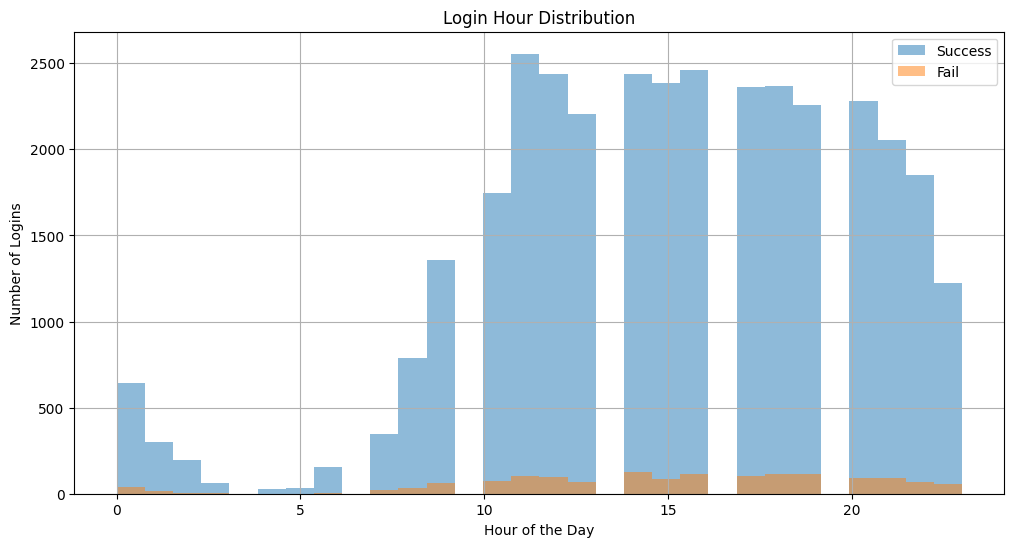

In [110]:
plt.figure(figsize=(12, 6))
data_success['login_hour'].hist(alpha=0.5, label='Success', bins=30)
data_fail['login_hour'].hist(alpha=0.5, label='Fail', bins=30)
plt.title('Login Hour Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Logins')
plt.legend()
plt.show()

Q2 : Analyze device usage

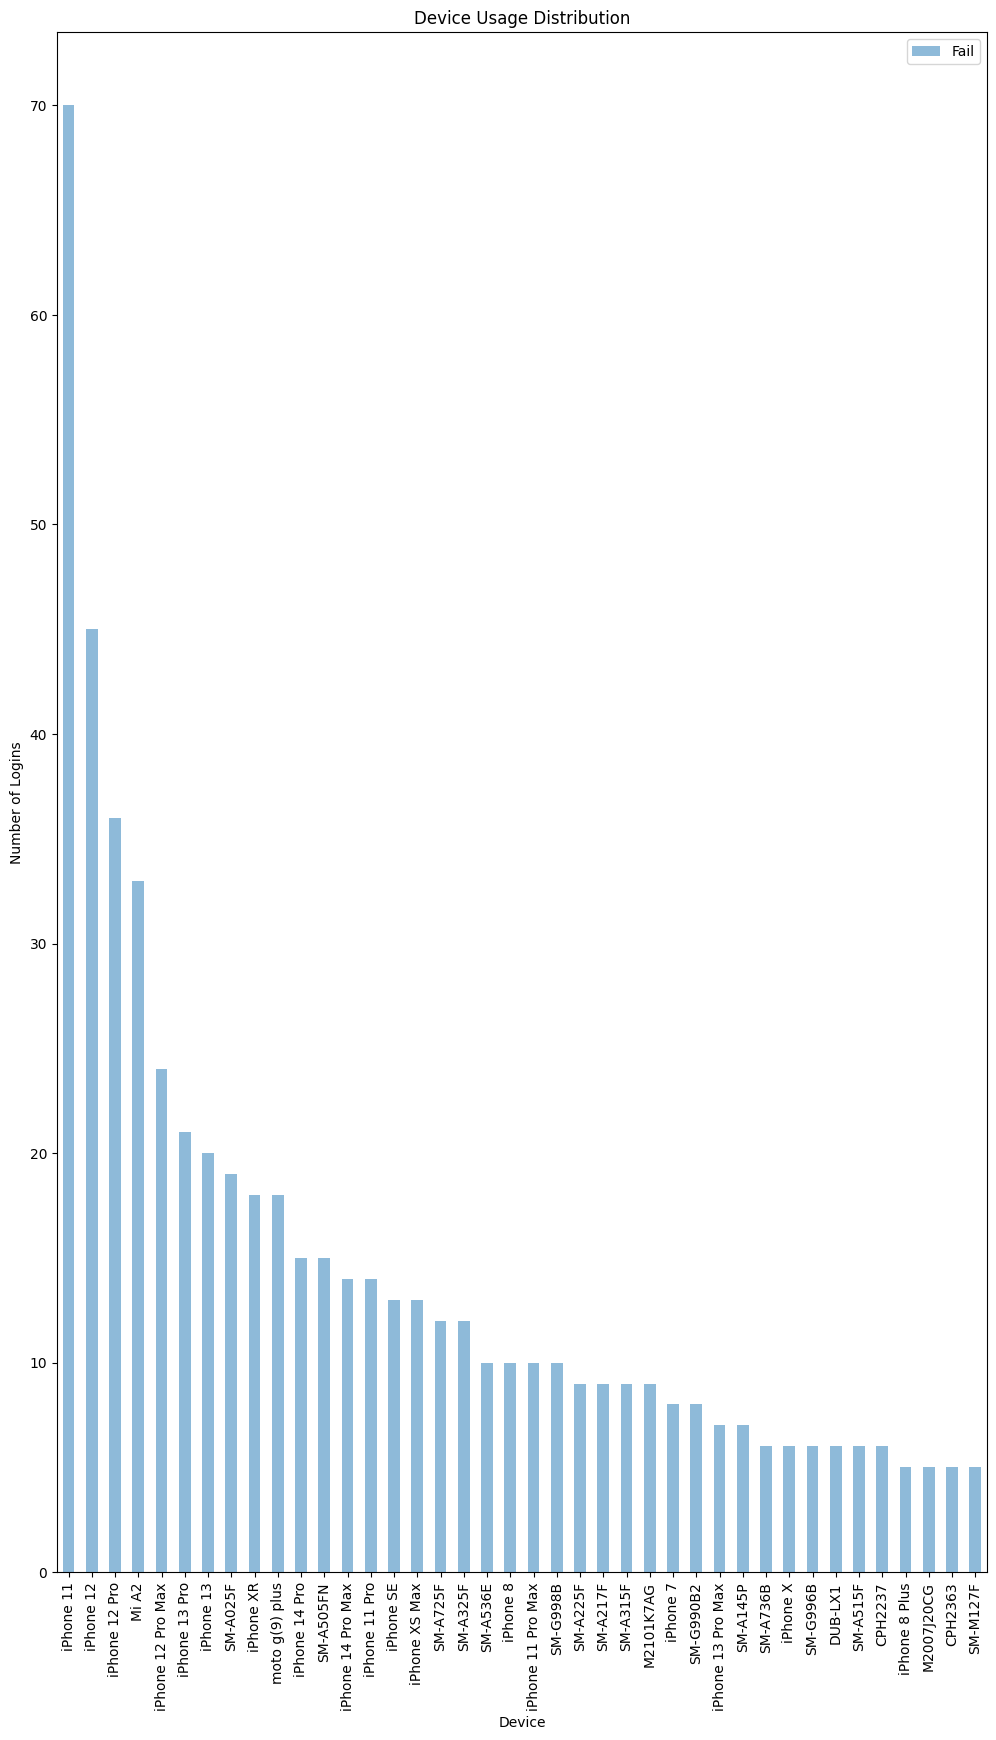

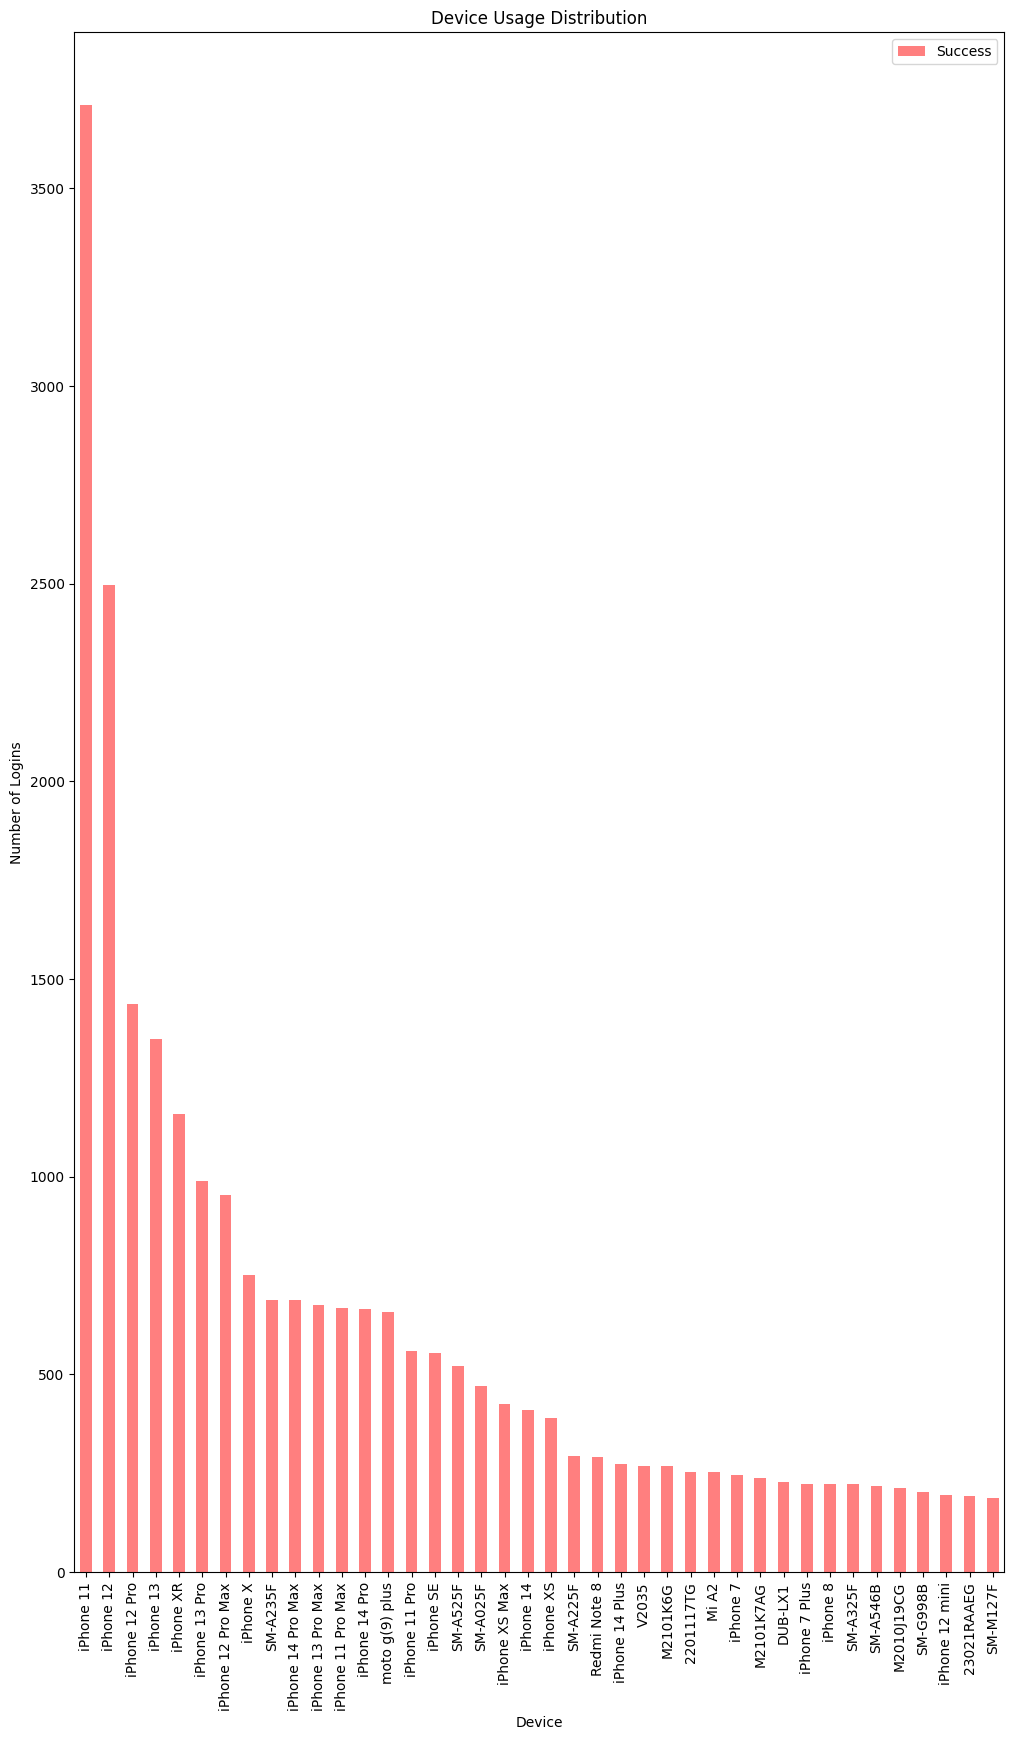

In [111]:
device_usage_success = data_success['model'].value_counts().nlargest(40)
device_usage_fail = data_fail['model'].value_counts().nlargest(40)
plt.figure(figsize=(12, 20))
device_usage_fail.plot(kind='bar', alpha=0.5, label='Fail')
plt.title('Device Usage Distribution')
plt.xlabel('Device')
plt.ylabel('Number of Logins')
plt.legend()
plt.show()
plt.figure(figsize=(12, 20))
device_usage_success.plot(kind='bar', alpha=0.5, label='Success',color='red')
plt.title('Device Usage Distribution')
plt.xlabel('Device')
plt.ylabel('Number of Logins')
plt.legend()
plt.show()



Identify Non-Typical Usage Patterns:

In [112]:
unique_ips = data_success['ip_address'].unique()
unique_models = data_success['model'].unique()
model_counts = data_success['model'].value_counts()

In [113]:
suspicious_activity = data_fail[data_fail['reason'] == 'Bad credentials']

Differentiate Between Non-Typical Usage and Fraudsters:

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [115]:
data_fail['fraud'] = 1
data_success['fraud'] = 0

In [116]:
combined_data = pd.concat([data_success, data_fail], ignore_index=True)

In [117]:
combined_data

,success,ip_address,created_date,uuid,model,login_hour,fraud,attempt,reason
0,1064545.0,162.158.22.88,2023-11-22 14:54:39.731321,c9f59dc1-b176-4866-8bdd-e1d4dc30d927,iPhone 8,14,0,NaN,NaN
1,1064544.0,172.64.238.8,2023-11-22 14:51:45.191319,cf79fc3b-6e50-4970-a8e8-07c104befd28,iPhone X,14,0,NaN,NaN
2,1064543.0,172.64.236.137,2023-11-22 14:51:31.571488,0b291606-497f-4e8d-a9e3-08b9c7ee4d15,iPhone 12 Pro,14,0,NaN,NaN
3,1064542.0,172.71.186.220,2023-11-22 14:50:57.015136,b08445cb-9d18-499e-a23e-ad5895208e02,MRD-LX1F,14,0,NaN,NaN
4,1064541.0,188.114.111.57,2023-11-22 14:50:07.160930,a789e91b-a8f6-43c8-bed8-bf512d067b75,M2010J19CG,14,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
36027,NaN,172.68.134.46,2023-09-02 14:45:03.291598,f796434b-6eac-4d5f-bad0-37d6cd3f5fb9,iPhone 12 Pro,14,1,677452.0,Bad credentials
36028,NaN,172.70.57.179,2023-09-02 08:34:34.787399,3551e133-682d-4a9b-bb36-88b40660c2b5,iPhone 13 Pro Max,8,1,490909.0,Bad credentials
36029,NaN,172.70.57.143,2023-09-01 17:16:36.954533,cc3518be-0c2f-46f3-9eb5-e030cc02bf6c,iPhone 11,17,1,490967.0,ERR-404002
36030,NaN,162.158.22.164,2023-09-01 15:00:48.058871,9b1d5627-9e97-479f-9f78-344b9ade1c66,iPhone XS,15,1,490907.0,Bad credentials


In [118]:
combined_data['created_date'] = pd.to_datetime(combined_data['created_date'])
combined_data['hour'] = combined_data['created_date'].dt.hour
combined_data['day'] = combined_data['created_date'].dt.day
combined_data['month'] = combined_data['created_date'].dt.month


In [119]:
combined_data=combined_data.drop(columns=['success','attempt','reason','created_date'])

In [120]:
combined_data_encoded = pd.get_dummies(combined_data, columns=['model','ip_address','uuid'])


In [121]:
X_train, X_test, y_train, y_test = train_test_split(
    combined_data_encoded.drop('fraud', axis=1),
    combined_data_encoded['fraud'],
    test_size=0.2,
    random_state=42
)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      6912
           1       0.50      0.34      0.41       295

    accuracy                           0.96      7207
   macro avg       0.74      0.66      0.69      7207
weighted avg       0.95      0.96      0.96      7207

